In [59]:
import yfinance as yf 
import pandas as pd
from matplotlib import pylab as plt
import numpy as np
from datetime import datetime 

import quandl

import seaborn as sns

import sys

from scipy.stats import norm
import pandas_datareader.data as web

from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Analysis of the Drivers of Gold

This script looks for what drives the price of Gold, which should be inflation since Gold is a dead asset. With low inflation of the monetary system gold should perform poorly. But is this true? Lets find out.

In [14]:
Gold_tmp = quandl.get("LBMA/GOLD", authtoken="6rNSyTM5R4g7_B7XSyQW")
M2_tmp = web.DataReader("M2NS", "fred", datetime(1960, 1, 1))

In [19]:
Gold =Gold_tmp['USD (AM)']

Gold = Gold.resample('M').last()

In [69]:
data_tmp = pd.concat([Gold, M2_tmp], axis = 1)
data_tmp = data_tmp.ffill()
data_tmp = data_tmp.dropna()

dates_month = pd.bdate_range(data_tmp.index.min(), data_tmp.index.max(), freq='1M')
data = data_tmp[data_tmp.index.isin(dates_month)]

data = data.pct_change(100)
data = data.dropna()
data.columns = ['Gold', 'M2']

Correlation: 0.06311984149256392


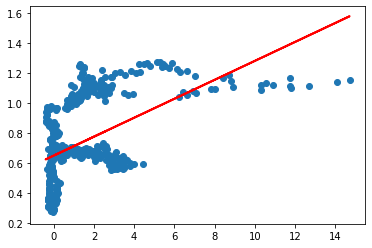

In [70]:
regressor = LinearRegression()  
regressor.fit(data['Gold'].values.reshape(-1,1), data['M2'].values.reshape(-1,1))

y_pred = regressor.predict(data['Gold'].values.reshape(-1,1))

plt.scatter(data['Gold'], data['M2'])
plt.plot(data['Gold'], y_pred, color='red', linewidth=2)

print("Correlation: " + str(float(regressor.coef_)))

In [79]:
data.rolling(12).mean()

,Gold,M2
1976-05-31,NaN,NaN
1976-06-30,NaN,NaN
1976-07-31,NaN,NaN
1976-08-31,NaN,NaN
1976-09-30,NaN,NaN
...,...,...
2020-03-31,-0.046291,0.649804
2020-04-30,-0.031369,0.660031
2020-05-31,-0.029618,0.675936
2020-06-30,-0.030628,0.693568


In [80]:
corr = data['Gold'].rolling(252).corr(data['M2'])

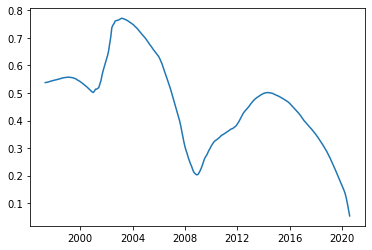

In [81]:
plt.plot(corr)

In [78]:
corr

1976-05-31         NaN
1976-06-30         NaN
1976-07-31         NaN
1976-08-31         NaN
1976-09-30         NaN
                ...   
2020-03-31    0.132788
2020-04-30    0.116899
2020-05-31    0.096530
2020-06-30    0.074319
2020-07-31    0.053492
Length: 531, dtype: float64

# Gold correlation with Stocks to gold ratio


In [1]:
Gold = pd.DataFrame(Gold_tmp["USD (AM)"])
SP500 = pd.DataFrame(SP500_daily_tmp['Close'])

NameError: name 'pd' is not defined

In [2]:
data = pd.concat([SP500,Gold], axis = 1)
data = data.ffill()
data = data.dropna()
data = data.fillna(1)
data.columns = ['SP', 'Gold']


NameError: name 'pd' is not defined

In [3]:
Stocks_to_gold = data[['SP']].div(data['Gold'], axis = 0)
Stocks_to_gold.columns = ['Stocks/Gold']
Gold_to_stocks = data[['Gold']].div(data['SP'], axis = 0)


NameError: name 'data' is not defined

In [4]:
data['SP'] = data['SP'].div(data['SP'].iloc[0])
data['Gold'] = data['Gold'].div(data['Gold'].iloc[0])

NameError: name 'data' is not defined

In [5]:
sns.set_style("darkgrid");
plt.figure(figsize=(20,10))
plt.plot(Stocks_to_gold)
plt.plot(data['Gold'])
plt.legend(('Stocks/Gold', 'Gold'), loc=2, prop={'size': 20})

NameError: name 'sns' is not defined

In [6]:
daily_data = data/data.shift(1)
daily_data = daily_data.fillna(1)

NameError: name 'data' is not defined

In [7]:
s1 = data['Gold']
s2 = Stocks_to_gold.iloc[:, 0]
rolling_corr = s1.rolling(252).corr(s2)
plt.plot(rolling_corr)
print("Average correlation = " + str(round(float(rolling_corr.mean()), 2)))

NameError: name 'data' is not defined

Obviously negative correaltion since the gold price is usen in stocks/gold. Would be more interesting to see if the gold/stock ratio has any predictive ability of future gold price.